In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from model_metrics import *
from fancyimpute import *
import pickle
from sklearn.metrics import roc_curve, auc

Using TensorFlow backend.


# Multiple Imputation Testing

For information on algorithms, see [fancyimpute](https://pypi.python.org/pypi/fancyimpute)

Make all the solver objects

In [5]:
train_data = pd.read_csv('data/train_data.csv')

In [6]:
KNN_solver = KNN(k=5)
softimpute_solver = SoftImpute()
MICE_solver = MICE()
simple_solver = SimpleFill()
iterativeSVD_solver = IterativeSVD()
matrixfactorization_solver = MatrixFactorization()

Create a dataframe from the complete data in `train_data`. Then, randomly insert some NaNs for MSE testing.

In [7]:
# Drop NaNs
complete_data = train_data.dropna()

In [8]:
# Drop DX and DXSUB
complete_data.drop(columns=['DX', 'DXSUB'], inplace=True)

/home/christie/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
# Randomly insert NaNs
nan_inserted_data = complete_data.copy()
import random
ix = [(row, col) for row in range(complete_data.shape[0]) for col in range(complete_data.shape[1])]
for row, col in random.sample(ix, int(round(.1*len(ix)))):
    nan_inserted_data.iat[row, col] = np.nan

In [10]:
missing_mask = nan_inserted_data.isna().any(axis=1)

Complete those missing dataframes with the various solvers!

In [11]:
def test_imputation(solver, df):
    """Impute the data using imputation method"""
    impute_data = df.values
    data_index = df.index
    data_cols = df.columns

    impute_data_filled = solver.complete(impute_data)
    impute_df = pd.DataFrame(impute_data_filled, index=data_index, columns=data_cols)
    return impute_df

In [12]:
KNN_df = test_imputation(KNN_solver, nan_inserted_data)

Imputing row 1/429 with 4 missing, elapsed time: 0.066
Imputing row 101/429 with 3 missing, elapsed time: 0.116
Imputing row 201/429 with 2 missing, elapsed time: 0.126
Imputing row 301/429 with 3 missing, elapsed time: 0.133
Imputing row 401/429 with 4 missing, elapsed time: 0.138


In [13]:
softimpute_df = test_imputation(softimpute_solver, nan_inserted_data)

[SoftImpute] Max Singular Value of X_init = 6080.899246
[SoftImpute] Iter 1: observed MAE=1.583162 rank=7
[SoftImpute] Iter 2: observed MAE=1.538878 rank=6
[SoftImpute] Iter 3: observed MAE=1.542962 rank=6
[SoftImpute] Iter 4: observed MAE=1.560024 rank=6
[SoftImpute] Iter 5: observed MAE=1.573310 rank=6
[SoftImpute] Iter 6: observed MAE=1.575051 rank=5
[SoftImpute] Iter 7: observed MAE=1.576698 rank=5
[SoftImpute] Iter 8: observed MAE=1.577989 rank=5
[SoftImpute] Iter 9: observed MAE=1.578965 rank=5
[SoftImpute] Iter 10: observed MAE=1.579651 rank=5
[SoftImpute] Iter 11: observed MAE=1.580118 rank=5
[SoftImpute] Iter 12: observed MAE=1.580455 rank=5
[SoftImpute] Iter 13: observed MAE=1.580701 rank=5
[SoftImpute] Iter 14: observed MAE=1.580884 rank=5
[SoftImpute] Iter 15: observed MAE=1.581027 rank=5
[SoftImpute] Iter 16: observed MAE=1.581135 rank=5
[SoftImpute] Iter 17: observed MAE=1.581220 rank=5
[SoftImpute] Iter 18: observed MAE=1.581285 rank=5
[SoftImpute] Iter 19: observed MAE=

/home/christie/anaconda2/envs/py36/lib/python3.6/site-packages/fancyimpute/soft_impute.py:100: RuntimeWarning: divide by zero encountered in double_scalars
  return (np.sqrt(ssd) / old_norm) < self.convergence_threshold


In [14]:
MICE_df = test_imputation(MICE_solver, nan_inserted_data)

[MICE] Completing matrix with shape (429, 35)
[MICE] Starting imputation round 1/110, elapsed time 0.001
[MICE] Starting imputation round 2/110, elapsed time 0.022
[MICE] Starting imputation round 3/110, elapsed time 0.033
[MICE] Starting imputation round 4/110, elapsed time 0.044
[MICE] Starting imputation round 5/110, elapsed time 0.055
[MICE] Starting imputation round 6/110, elapsed time 0.066
[MICE] Starting imputation round 7/110, elapsed time 0.077
[MICE] Starting imputation round 8/110, elapsed time 0.089
[MICE] Starting imputation round 9/110, elapsed time 0.101
[MICE] Starting imputation round 10/110, elapsed time 0.112
[MICE] Starting imputation round 11/110, elapsed time 0.122
[MICE] Starting imputation round 12/110, elapsed time 0.131
[MICE] Starting imputation round 13/110, elapsed time 0.139
[MICE] Starting imputation round 14/110, elapsed time 0.148
[MICE] Starting imputation round 15/110, elapsed time 0.157
[MICE] Starting imputation round 16/110, elapsed time 0.165
[MI

In [15]:
simple_df = test_imputation(simple_solver, nan_inserted_data)

In [16]:
iterative_df = test_imputation(iterativeSVD_solver, nan_inserted_data)

[IterativeSVD] Iter 1: observed MAE=4.208460
[IterativeSVD] Iter 2: observed MAE=2.320813
[IterativeSVD] Iter 3: observed MAE=1.347509
[IterativeSVD] Iter 4: observed MAE=0.516247
[IterativeSVD] Iter 5: observed MAE=0.401785
[IterativeSVD] Iter 6: observed MAE=0.399566
[IterativeSVD] Iter 7: observed MAE=0.399899
[IterativeSVD] Iter 8: observed MAE=0.400381
[IterativeSVD] Iter 9: observed MAE=0.400757
[IterativeSVD] Iter 10: observed MAE=0.400961
[IterativeSVD] Iter 11: observed MAE=0.401011
[IterativeSVD] Iter 12: observed MAE=0.400916
[IterativeSVD] Iter 13: observed MAE=0.400714
[IterativeSVD] Iter 14: observed MAE=0.400447
[IterativeSVD] Iter 15: observed MAE=0.400167


/home/christie/anaconda2/envs/py36/lib/python3.6/site-packages/fancyimpute/iterative_svd.py:53: RuntimeWarning: divide by zero encountered in double_scalars
  return (ssd / old_norm_squared) < self.convergence_threshold


In [17]:
matrixfact_df = test_imputation(matrixfactorization_solver, nan_inserted_data)

Train on 12161 samples, validate on 1352 samples
Epoch 1/10000
 - 0s - loss: 1.1066 - val_loss: 1.0695
Epoch 2/10000
 - 0s - loss: 1.1044 - val_loss: 1.0689
Epoch 3/10000
 - 0s - loss: 1.1028 - val_loss: 1.0684
Epoch 4/10000
 - 0s - loss: 1.1013 - val_loss: 1.0678
Epoch 5/10000
 - 0s - loss: 1.0998 - val_loss: 1.0673
Epoch 6/10000
 - 0s - loss: 1.0983 - val_loss: 1.0667
Epoch 7/10000
 - 0s - loss: 1.0967 - val_loss: 1.0662
Epoch 8/10000
 - 0s - loss: 1.0952 - val_loss: 1.0656
Epoch 9/10000
 - 0s - loss: 1.0936 - val_loss: 1.0651
Epoch 10/10000
 - 0s - loss: 1.0920 - val_loss: 1.0645
Epoch 11/10000
 - 0s - loss: 1.0903 - val_loss: 1.0640
Epoch 12/10000
 - 0s - loss: 1.0887 - val_loss: 1.0634
Epoch 13/10000
 - 0s - loss: 1.0870 - val_loss: 1.0628
Epoch 14/10000
 - 0s - loss: 1.0854 - val_loss: 1.0623
Epoch 15/10000
 - 0s - loss: 1.0837 - val_loss: 1.0617
Epoch 16/10000
 - 0s - loss: 1.0820 - val_loss: 1.0611
Epoch 17/10000
 - 0s - loss: 1.0803 - val_loss: 1.0605
Epoch 18/10000
 - 0s - lo

Epoch 149/10000
 - 0s - loss: 0.8881 - val_loss: 0.9781
Epoch 150/10000
 - 0s - loss: 0.8864 - val_loss: 0.9771
Epoch 151/10000
 - 0s - loss: 0.8848 - val_loss: 0.9761
Epoch 152/10000
 - 0s - loss: 0.8831 - val_loss: 0.9751
Epoch 153/10000
 - 0s - loss: 0.8815 - val_loss: 0.9741
Epoch 154/10000
 - 0s - loss: 0.8798 - val_loss: 0.9730
Epoch 155/10000
 - 0s - loss: 0.8781 - val_loss: 0.9720
Epoch 156/10000
 - 0s - loss: 0.8764 - val_loss: 0.9710
Epoch 157/10000
 - 0s - loss: 0.8748 - val_loss: 0.9699
Epoch 158/10000
 - 0s - loss: 0.8731 - val_loss: 0.9689
Epoch 159/10000
 - 0s - loss: 0.8714 - val_loss: 0.9678
Epoch 160/10000
 - 0s - loss: 0.8697 - val_loss: 0.9668
Epoch 161/10000
 - 0s - loss: 0.8679 - val_loss: 0.9657
Epoch 162/10000
 - 0s - loss: 0.8662 - val_loss: 0.9646
Epoch 163/10000
 - 0s - loss: 0.8645 - val_loss: 0.9635
Epoch 164/10000
 - 0s - loss: 0.8628 - val_loss: 0.9624
Epoch 165/10000
 - 0s - loss: 0.8610 - val_loss: 0.9613
Epoch 166/10000
 - 0s - loss: 0.8593 - val_loss:

Epoch 296/10000
 - 0s - loss: 0.6252 - val_loss: 0.7978
Epoch 297/10000
 - 0s - loss: 0.6237 - val_loss: 0.7968
Epoch 298/10000
 - 0s - loss: 0.6221 - val_loss: 0.7957
Epoch 299/10000
 - 0s - loss: 0.6206 - val_loss: 0.7947
Epoch 300/10000
 - 0s - loss: 0.6191 - val_loss: 0.7936
Epoch 301/10000
 - 0s - loss: 0.6176 - val_loss: 0.7926
Epoch 302/10000
 - 0s - loss: 0.6162 - val_loss: 0.7916
Epoch 303/10000
 - 0s - loss: 0.6147 - val_loss: 0.7906
Epoch 304/10000
 - 0s - loss: 0.6132 - val_loss: 0.7896
Epoch 305/10000
 - 0s - loss: 0.6117 - val_loss: 0.7886
Epoch 306/10000
 - 0s - loss: 0.6103 - val_loss: 0.7876
Epoch 307/10000
 - 0s - loss: 0.6088 - val_loss: 0.7866
Epoch 308/10000
 - 0s - loss: 0.6074 - val_loss: 0.7856
Epoch 309/10000
 - 0s - loss: 0.6060 - val_loss: 0.7846
Epoch 310/10000
 - 0s - loss: 0.6045 - val_loss: 0.7836
Epoch 311/10000
 - 0s - loss: 0.6031 - val_loss: 0.7827
Epoch 312/10000
 - 0s - loss: 0.6017 - val_loss: 0.7817
Epoch 313/10000
 - 0s - loss: 0.6003 - val_loss:

Epoch 443/10000
 - 0s - loss: 0.4652 - val_loss: 0.6978
Epoch 444/10000
 - 0s - loss: 0.4644 - val_loss: 0.6974
Epoch 445/10000
 - 0s - loss: 0.4636 - val_loss: 0.6970
Epoch 446/10000
 - 0s - loss: 0.4628 - val_loss: 0.6966
Epoch 447/10000
 - 0s - loss: 0.4621 - val_loss: 0.6963
Epoch 448/10000
 - 0s - loss: 0.4613 - val_loss: 0.6959
Epoch 449/10000
 - 0s - loss: 0.4606 - val_loss: 0.6955
Epoch 450/10000
 - 0s - loss: 0.4598 - val_loss: 0.6952
Epoch 451/10000
 - 0s - loss: 0.4591 - val_loss: 0.6948
Epoch 452/10000
 - 0s - loss: 0.4583 - val_loss: 0.6944
Epoch 453/10000
 - 0s - loss: 0.4576 - val_loss: 0.6941
Epoch 454/10000
 - 0s - loss: 0.4568 - val_loss: 0.6937
Epoch 455/10000
 - 0s - loss: 0.4561 - val_loss: 0.6934
Epoch 456/10000
 - 0s - loss: 0.4553 - val_loss: 0.6930
Epoch 457/10000
 - 0s - loss: 0.4546 - val_loss: 0.6927
Epoch 458/10000
 - 0s - loss: 0.4538 - val_loss: 0.6924
Epoch 459/10000
 - 0s - loss: 0.4531 - val_loss: 0.6920
Epoch 460/10000
 - 0s - loss: 0.4524 - val_loss:

### Now cast as ints

In [18]:
solver_list = [KNN_df, softimpute_df, MICE_df,
               simple_df, iterative_df, matrixfact_df]
solver_names = ['KNN', 'SoftImpute', 'MICE', 'SimpleFill',
                   'IterativeSVD', 'MatrixFactorization']

In [19]:
KNN_df_round = KNN_df.copy()
softimpute_df_round = softimpute_df.copy()
MICE_df_round = MICE_df.copy()
simple_df_round = simple_df.copy()
iterative_df_round = iterative_df.copy()
matrixfact_df_round = matrixfact_df.copy()

In [20]:
round_list = [KNN_df_round, softimpute_df_round, MICE_df_round,
              simple_df_round, iterative_df_round, matrixfact_df_round]
round_names = ['KNN_round', 'SoftImpute_round', 'MICE_round',
            'SimpleFill_round', 'IterativeSVD_round', 'MatrixFact_round']

In [21]:
int_cols = ['SSBK_NUMCOMPLETE_Y1', 'SSFD_NUMCOMPLETE_Y1',
            'Y1_CLWRD_COND1', 'Y1_CLWRD_COND2', 'Y1_DIGITS_BKWD_RS',
            'Y1_DIGITS_FRWD_RS', 'Y1_TRAILS_COND2', 'Y1_TRAILS_COND3']
for df in round_list:
    for col in int_cols:
        df[col] = df[col].astype('int')

### Create MSEs for each

In [22]:
total_df_list = solver_list + round_list
total_df_names = solver_names + round_names

In [23]:
mse_df = pd.DataFrame(index=total_df_names, columns=complete_data.columns)

In [24]:
i = 0
for df, name in zip(total_df_list, total_df_names):
    mse = ((df[missing_mask] - complete_data[missing_mask]) ** 2).mean()
    mse_df.loc[name] = mse
    i += 1

In [25]:
mse_df

,STOP_SSRTAVE_Y1,DPRIME1_Y1,DPRIME2_Y1,SSBK_NUMCOMPLETE_Y1,SSFD_NUMCOMPLETE_Y1,V_Y1,Y1_CLWRD_COND1,Y1_CLWRD_COND2,Y1_DIGITS_BKWD_RS,Y1_DIGITS_FRWD_RS,...,Y1_P_TMCQ_SOOTHE,Y1_P_TMCQ_ASSERT,Y1_P_TMCQ_ATTFOCUS,Y1_P_TMCQ_LIP,Y1_P_TMCQ_PERCEPT,Y1_P_TMCQ_DISCOMF,Y1_P_TMCQ_OPENNESS,Y1_P_TMCQ_SURGENCY,Y1_P_TMCQ_EFFCONT,Y1_P_TMCQ_NEGAFFECT
KNN,1692.93,0.0332995,0.0393322,0.953592,0.507797,0.0406269,15.8956,4.20788,0.438927,0.558573,...,0.0829188,0.0383403,0.175969,0.0252375,0.0570308,0.0632523,0.0282452,0.0447257,0.0200182,0.0215296
SoftImpute,3918.77,0.0690016,0.100824,1.5714,1.56099,0.108418,13.9343,3.00175,0.771189,1.25317,...,0.131643,0.113785,0.206361,0.109146,0.0925645,0.0672386,0.0847141,0.125527,0.0992259,0.0330514
MICE,1259.84,0.03645,0.0358659,0.763442,0.640531,0.0359388,12.2544,2.91361,0.41862,0.535761,...,0.0620709,0.0358974,0.116804,0.0302898,0.0437095,0.0418762,0.0256708,0.0405498,0.0150929,0.0185244
SimpleFill,1484.93,0.0522512,0.0583506,0.899629,0.689608,0.0477081,16.5572,5.9683,0.45258,0.667103,...,0.0641693,0.038189,0.124899,0.0308146,0.045697,0.046992,0.0280636,0.0376272,0.017678,0.0178367
IterativeSVD,7372.97,0.0293732,0.0334537,1.33936,0.848333,0.05205,14.8816,3.69057,0.477076,0.603639,...,0.0462509,0.0465756,0.0748318,0.0279538,0.0504384,0.0259348,0.0338978,0.0500156,0.0232668,0.00824457
MatrixFactorization,1398.71,0.0236747,0.0391589,0.60515,0.733518,0.0385387,12.3965,3.3146,0.36721,0.406933,...,0.0580877,0.0391018,0.0818113,0.0201365,0.038836,0.0245927,0.0309999,0.0167686,0.00623255,0.00357768
KNN_round,1692.93,0.0332995,0.0393322,0.992908,0.513002,0.0406269,15.8652,4.40662,0.420804,0.635934,...,0.0829188,0.0383403,0.175969,0.0252375,0.0570308,0.0632523,0.0282452,0.0447257,0.0200182,0.0215296
SoftImpute_round,3918.77,0.0690016,0.100824,1.67376,1.83215,0.108418,14.3239,2.96217,0.926714,1.40426,...,0.131643,0.113785,0.206361,0.109146,0.0925645,0.0672386,0.0847141,0.125527,0.0992259,0.0330514
MICE_round,1259.84,0.03645,0.0358659,0.867612,0.794326,0.0359388,12.3215,2.82033,0.416076,0.617021,...,0.0620709,0.0358974,0.116804,0.0302898,0.0437095,0.0418762,0.0256708,0.0405498,0.0150929,0.0185244
SimpleFill_round,1484.93,0.0522512,0.0583506,0.917258,0.728132,0.0477081,16.6359,5.88416,0.524823,0.685579,...,0.0641693,0.038189,0.124899,0.0308146,0.045697,0.046992,0.0280636,0.0376272,0.017678,0.0178367


### Which method has the lowest MSEs?

Write `true` for minimums in each col

In [26]:
mse_df_bool = mse_df.copy()
for col in mse_df.columns:
    mse_df_bool[col] = (mse_df_bool[col] == np.min(mse_df_bool[col]))

In [32]:
mse_df_bool.shape

(12, 35)

In [31]:
list(mse_df_bool.sum(axis=1).values)

[2, 1, 8, 1, 3, 19, 0, 1, 7, 1, 3, 16]

In [28]:
int_cols_nodx = ['SSBK_NUMCOMPLETE_Y1',
 'SSFD_NUMCOMPLETE_Y1',
 'Y1_CLWRD_COND1',
 'Y1_CLWRD_COND2',
 'Y1_DIGITS_BKWD_RS',
 'Y1_DIGITS_FRWD_RS',
 'Y1_TRAILS_COND2',
 'Y1_TRAILS_COND3']

In [29]:
mse_df_bool[int_cols_nodx].sum(axis=1)

KNN                    2
SoftImpute             0
MICE                   2
SimpleFill             0
IterativeSVD           0
MatrixFactorization    3
KNN_round              0
SoftImpute_round       0
MICE_round             1
SimpleFill_round       0
IterativeSVD_round     0
MatrixFact_round       0
dtype: int64

However, MICE seems to do the best for columns that are technically integers (3 out of 8)

### Conclusions

Looks like MatrixFactorization is the best option. (out of 38 cols, 24 went to MatrixFactorization for the lowest MSE)

Rounding does not improve the MSE. 

# Testing for leaky data!

I had really high accuracy on my first logistic regression model (91% test accuracy on smaller train/test split, and 92% accuracy on cross-validated log models).

So, I want to investigate if I have any leaky data columns.

In [ ]:
X_train = train_data.drop(columns=['DX','DXSUB'])
y_train = train_data['DX']

In [ ]:
accuracy_list = []
for col in X_train_small.columns:
    # Drop the column
    X_train_dataset = X_train_small.drop(columns=col).values
    X_test_dataset = X_test_small.drop(columns=col).values
    
    # Impute the data if missing numbers
    if np.sum(np.isnan(X_train_dataset)) > 0:
        X_train_final = impute_data(X_train_dataset)
    else:
        X_train_final = X_train_dataset.copy()

    if np.sum(np.isnan(X_test_dataset)) > 0:
        X_test_final = impute_data(X_test_dataset)
    else:
        X_test_final = X_test_dataset.copy()
        
    # Fit model
    model = LogisticRegression()
    model.fit(X_train_final, y_train_small)
    
    # Score model
    accuracy = model.score(y_test_final, y_test_small)
    accuracy_list.append((col, accuracy))

In [ ]:
accuracy_list
for col, acc in accuracy_list:
    print("Accuracy removing {}: \t \t {:2.2f}".format(col, acc).expandtabs(10))

In [ ]:
X_train_small_impute = impute_data(X_train_small.values)

In [ ]:
logreg.fit(X_train_small_impute, y_train_small.values)

In [ ]:
logreg.score(impute_data(X_test_small.values), y_test_small.values)

Looks like there aren't any leaky variables. I just have high accuracy.

This makes sense - the lab wouldn't administer tests or behavioral questionnaires that don't have something to do with ADHD. So a straight logistical model is pretty accurate.

Going forward, I want to do a few things:

- How high can I get the accuracy? Test out a few different models (RF, Gradient Boosting)
- What's the spread of the predicted probas like?
- Test out on DXSUB

# Logistic Model Metrics Visualization

In [ ]:
X_train_DX = train_data.drop(columns=['DX','DXSUB'])
y_train_DX = train_data['DX']

In [ ]:
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(
                    X_train_DX, y_train_DX, test_size=0.2, random_state=56)

In [ ]:
logmod = LogisticRegression()
logmod.fit(impute_data(X_train_small.values), y_train_small)

In [ ]:
pred_prob_dx = logmod.predict_proba(impute_data(X_test_small.values))

In [ ]:
prob_dx = logmod.predict(impute_data(X_test_small.values))

In [ ]:
len(pred_prob_dx[:,0])

In [ ]:
def make_jitter(data, jitter=0.1):
    return np.random.uniform(-jitter, jitter, size=data.shape)

In [ ]:
fig, ax = plt.subplots(figsize=(10,2))

_ = ax.scatter(pred_prob_dx[:,0], make_jitter(pred_prob_dx[:,0]), c=np.vectorize(dx_dict.get)(y_test_small),
           s=40, alpha=0.5)
_ = ax.set_xlim(0,1)
_ = ax.set_title('Predicted Probability of Positive vs Negative Classes')

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_small, prob_dx, pos_label=3, drop_intermediate=False)
roc_auc = auc(fpr, tpr)

In [ ]:
plt.plot(fpr, tpr)

# Classification Metrics

I created logistic regression, random forest, and gradient boosting models. I want to see the MSE and accuracy on train/test, cross-validated (k-fold=10), when predicting DX, and when predicting DXSUB.

In [ ]:
#train_data = pd.read_csv('data/train_data.csv')

In [ ]:
#%%capture
#classifier_metrics = run_classifiers(train_data)

In [ ]:
#with open('classifier_metrics.pkl', 'wb') as f:
    #pickle.dump(classifier_metrics, f)

In [ ]:
classification_metrics = pickle.load(open("classifier_metrics.pkl", "rb"))

In [ ]:
#[clf][pred][metric][train/test]
# Logistic Regression
lr_dx_mse_train = np.mean(classification_metrics[0][0][0][0])
lr_dx_mse_test = np.mean(classification_metrics[0][0][0][1])
lr_dx_acc_train = np.mean(classification_metrics[0][0][1][0])
lr_dx_acc_test = np.mean(classification_metrics[0][0][1][1])

lr_dxsub_mse_train = np.mean(classification_metrics[0][1][0][0])
lr_dxsub_mse_test = np.mean(classification_metrics[0][1][0][1])
lr_dxsub_acc_train = np.mean(classification_metrics[0][1][1][0])
lr_dxsub_acc_test = np.mean(classification_metrics[0][1][1][1])

# Random Forest
rf_dx_mse_train = np.mean(classification_metrics[1][0][0][0])
rf_dx_mse_test = np.mean(classification_metrics[1][0][0][1])
rf_dx_acc_train = np.mean(classification_metrics[1][0][1][0])
rf_dx_acc_test = np.mean(classification_metrics[1][0][1][1])

rf_dxsub_mse_train = np.mean(classification_metrics[1][1][0][0])
rf_dxsub_mse_test = np.mean(classification_metrics[1][1][0][1])
rf_dxsub_acc_train = np.mean(classification_metrics[1][1][1][0])
rf_dxsub_acc_test = np.mean(classification_metrics[1][1][1][1])

# Gradient Boosting
gb_dx_mse_train = np.mean(classification_metrics[2][0][0][0])
gb_dx_mse_test = np.mean(classification_metrics[2][0][0][1])
gb_dx_acc_train = np.mean(classification_metrics[2][0][1][0])
gb_dx_acc_test = np.mean(classification_metrics[2][0][1][1])

gb_dxsub_mse_train = np.mean(classification_metrics[2][1][0][0])
gb_dxsub_mse_test = np.mean(classification_metrics[2][1][0][1])
gb_dxsub_acc_train = np.mean(classification_metrics[2][1][1][0])
gb_dxsub_acc_test = np.mean(classification_metrics[2][1][1][1])

In [ ]:
# Make dataframes
metrics_dx_dict = {'DX_acc_train': [lr_dx_acc_train, rf_dx_acc_train, gb_dx_acc_train],
                   'DX_acc_test': [lr_dx_acc_test, rf_dx_acc_test, gb_dx_acc_test],
                   'DX_mse_train': [lr_dx_mse_train, rf_dx_mse_train, gb_dx_mse_train],
                   'DX_mse_test': [lr_dx_mse_test, rf_dx_mse_test, gb_dx_mse_test]}

metrics_DX = pd.DataFrame(data=metrics_dx_dict,
                          columns=['DX_acc_train', 'DX_acc_test', 'DX_mse_train', 'DX_mse_test'],
                          index=['LogReg', 'RandomForest', 'GradBoost'])

In [ ]:
metrics_dxsub_dict = {'DXSUB_acc_train': [lr_dxsub_acc_train, rf_dxsub_acc_train, gb_dxsub_acc_train],
                   'DXSUB_acc_test': [lr_dxsub_acc_test, rf_dxsub_acc_test, gb_dxsub_acc_test],
                   'DXSUB_mse_train': [lr_dxsub_mse_train, rf_dxsub_mse_train, gb_dxsub_mse_train],
                   'DXSUB_mse_test': [lr_dxsub_mse_test, rf_dxsub_mse_test, gb_dxsub_mse_test]}

metrics_DXSUB = pd.DataFrame(data=metrics_dxsub_dict,
                             columns=['DXSUB_acc_train', 'DXSUB_acc_test', 'DXSUB_mse_train', 'DXSUB_mse_test'],
                             index=['LogReg', 'RandomForest', 'GradBoost'])

In [ ]:
metrics_DX.round(3)

In [ ]:
metrics_DXSUB.round(3)

# Neuropsych vs TMCQ

Now that I've evaluated models on all the data, I want to check out what accuracy and mse looks like for models run JUST on neuropsych, and JUST on TMCQ.

I'll use the same exact procedure as above, just with different X matrices.

In [ ]:
train_data = pd.read_csv('data/train_data.csv')

In [ ]:
X_TMCQ = train_data[['Y1_P_TMCQ_ACTIVCONT', 'Y1_P_TMCQ_ACTIVITY', 'Y1_P_TMCQ_AFFIL',
       'Y1_P_TMCQ_ANGER', 'Y1_P_TMCQ_FEAR', 'Y1_P_TMCQ_HIP',
       'Y1_P_TMCQ_IMPULS', 'Y1_P_TMCQ_INHIBIT', 'Y1_P_TMCQ_SAD',
       'Y1_P_TMCQ_SHY', 'Y1_P_TMCQ_SOOTHE', 'Y1_P_TMCQ_ASSERT',
       'Y1_P_TMCQ_ATTFOCUS', 'Y1_P_TMCQ_LIP', 'Y1_P_TMCQ_PERCEPT',
       'Y1_P_TMCQ_DISCOMF', 'Y1_P_TMCQ_OPENNESS', 'Y1_P_TMCQ_SURGENCY',
       'Y1_P_TMCQ_EFFCONT', 'Y1_P_TMCQ_NEGAFFECT']]

In [ ]:
X_TMCQ.shape

In [ ]:
X_neuro = train_data[['STOP_SSRTAVE_Y1', 'DPRIME1_Y1', 'DPRIME2_Y1', 'SSBK_NUMCOMPLETE_Y1',
       'SSFD_NUMCOMPLETE_Y1', 'V_Y1', 'Y1_CLWRD_COND1', 'Y1_CLWRD_COND2',
       'Y1_DIGITS_BKWD_RS', 'Y1_DIGITS_FRWD_RS', 'Y1_TRAILS_COND2',
       'Y1_TRAILS_COND3', 'CW_RES', 'TR_RES', 'Y1_TAP_SD_TOT_CLOCK']]

In [ ]:
y_all = train_data[['DX', 'DXSUB']]

In [ ]:
# Must drop subjects where ALL data is missing, due to matrix factorixation imputation
X_TMCQ_nonull = X_TMCQ.dropna(how='all')
X_neuro_nonull = X_neuro.dropna(how='all')

In [ ]:
%%capture
TMCQ_dx, TMCQ_dxsub = run_classifiers(X_TMCQ_nonull, y_all)

In [ ]:
TMCQ_dx

In [ ]:
TMCQ_dxsub

In [ ]:

neuro_dx, neuro_dxsub = run_classifiers(X_neuro_nonull, y_all)

In [ ]:
neuro_dx

In [ ]:
neuro_dxsub

# Building Pipeline for CV 

I just remembered that sklearn.pipeline is a thing.
So, I'm going to build that so cross-validation and multiple metrics are easier!

From sklearn:
```
from sklearn.pipeline import make_pipeline
clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1))
cross_val_score(clf, iris.data, iris.target, cv=cv)
...                                                 
array([ 0.97...,  0.93...,  0.95...])
```

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from fancyimpute import MICE
from impute_transform import ImputeTransform

In [ ]:
train_data = pd.read_csv('data/train_data.csv')
train_data_small = train_data.sample(n=100)
X = train_data_small.drop(columns=['DX','DXSUB'])
y = train_data_small['DX'].map({3:1,1:0})

In [ ]:
clf = make_pipeline(ImputeTransform(strategy=MatrixFactorization()), LogisticRegression(random_state=56))

In [ ]:
scoring = ['accuracy', 'roc_auc', 'neg_log_loss']

In [ ]:
scores = cross_validate(clf, X, y, scoring=scoring, cv=2, return_train_score=True)

In [ ]:
scores

### Final Thoughts for the day


My brain is pretty fried, so I'm gonna call it a night.

But here's next steps for tomorrow:
- Get this cross_validate function working for log_reg, rf, gb, and xgb
- Get this cross_validate function working for DXSUB
 - cause of the multiclass problem and all that
- Explore TMCQ and neuropsych more
 - The metrics were quite bad on these! And logistic regression actually performed better test-wise than RF and GB!
- Discuss next steps with Matt
 - Clustering ideas
 - How to approach hyperparam tuning

#### Clustering Ideas

[Subtyping ADHD Using Tempermant Dimensions](https://jamanetwork.com/journals/jamapsychiatry/fullarticle/1885709)

The above is a paper written by my boss (Dr. Karalunas) that utilized community detection analysis on the Temperment in Middle Childhood Questionnaire (TMCQ).
They had 437 children and used the TMCQ from year 1. 
They specifically used the [Fast Greedy algorithm](https://arxiv.org/abs/cond-mat/0408187) and found 3 profiles of children, which they labeled as "mild", "surgent", and "irritable".

I was thinking of trying to replicate this analysis on the full 901 dataset ([community detection in python](https://yoyoinwanderland.github.io/2017/08/08/Community-Detection-in-Python/)).
Then, I was thinking of trying different clustering algorithms to see if the same profiles seem to exist.

It'd basically be a study in reproducability.

They used physiological and MRI data to externally validate these profiles, which I don't really have. But I might be able to glean something interesting from the neuropsych data? Maybe? IDK. Focus on "are the profiles there".

# Pipeline Continuing

I want to test the following models:
- Logistic Regression
- Random Forest
- Gradient Boosting
- XGBoost

With the following metrics:
- ROC AUC
- Accuracy
- Log Loss

On the following data:
- DX
- DXSUB
- Neuropsych
- TMCQ

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from collections import defaultdict
from sklearn.metrics import make_scorer, accuracy_score, log_loss
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from impute_transform import ImputeTransform
from xgboost import XGBClassifier

# Running the models for real

In [ ]:
train_data = pd.read_csv('data/train_data.csv')
X = train_data.drop(columns=['DX','DXSUB'])
y = train_data['DX'].map({3:1,1:0})

In [ ]:
log_reg_clf = make_pipeline(ImputeTransform(strategy=MatrixFactorization()),
                        LogisticRegression(random_state=56))

rf_clf = make_pipeline(ImputeTransform(strategy=MatrixFactorization()),
                       RandomForestClassifier(n_jobs=-1, random_state=56))

gb_clf = make_pipeline(ImputeTransform(strategy=MatrixFactorization()),
                       GradientBoostingClassifier(random_state=56))

xgb_clf = make_pipeline(ImputeTransform(strategy=MatrixFactorization()),
                        XGBClassifier(max_depth=3, learning_rate=0.1,
                        random_state=56))

In [ ]:
scoring = ['accuracy', 'roc_auc', 'neg_log_loss']

In [ ]:
classifier_list = [log_reg_clf, rf_clf, gb_clf, xgb_clf]
classifier_name = ['LogReg', 'RandomForest', 'GradientBoosting', 'XGB']

In [ ]:
%%capture
classifier_metrics = {}
for clf, name in zip(classifier_list, classifier_name):
    scores = cross_validate(clf, X, y, scoring=scoring, cv=5, return_train_score=False)
    classifier_metrics[name] = scores

In [ ]:
classifier_metrics

In [ ]:
for classifier, dictionary in classifier_metrics.items():
    for metric, score in classifier_metrics[classifier].items():
        classifier_metrics[classifier][metric] = np.mean(score)

In [ ]:
name_of_metrics = ['fit_time', 'score_time', 'test_accuracy',
                   'test_neg_log_loss', 'test_roc_auc']

In [ ]:
metrics_df = pd.DataFrame(data=None,
                          index=classifier_name,
                          columns=name_of_metrics)

In [ ]:
for clf in classifier_name:
    for metric in name_of_metrics:
        metrics_df[metric].loc[clf] = classifier_metrics[clf][metric]

In [ ]:
metrics_df

In [ ]:
# testing on holdout to see if its somewhat similar or
# super off like it was for tmcq...
holdout_data = pd.read_csv('data/holdout_data.csv')
X_test = holdout_data.drop(columns=['DX','DXSUB'])
y_test = holdout_data['DX'].map({3:1,1:0})
# yep, it worked there...

XGB and LogReg have the best AUC scores, and log_loss scores. Even though GB had the highest test accuracy, I think XGB and LogReg are the models to explore.

### TMCQ

I also want to run this on Neuropsych and TMCQ data. It seemed like last time, RF and GB overfit - but XGBoost has regularization so this might mediate that problem.

In [ ]:
X_TMCQ = train_data[['Y1_P_TMCQ_ACTIVCONT', 'Y1_P_TMCQ_ACTIVITY', 'Y1_P_TMCQ_AFFIL',
       'Y1_P_TMCQ_ANGER', 'Y1_P_TMCQ_FEAR', 'Y1_P_TMCQ_HIP',
       'Y1_P_TMCQ_IMPULS', 'Y1_P_TMCQ_INHIBIT', 'Y1_P_TMCQ_SAD',
       'Y1_P_TMCQ_SHY', 'Y1_P_TMCQ_SOOTHE', 'Y1_P_TMCQ_ASSERT',
       'Y1_P_TMCQ_ATTFOCUS', 'Y1_P_TMCQ_LIP', 'Y1_P_TMCQ_PERCEPT',
       'Y1_P_TMCQ_DISCOMF', 'Y1_P_TMCQ_OPENNESS', 'Y1_P_TMCQ_SURGENCY',
       'Y1_P_TMCQ_EFFCONT', 'Y1_P_TMCQ_NEGAFFECT']]

In [ ]:
X_TMCQ_nonull = X_TMCQ[X_TMCQ.isnull().sum(axis=1) == 0]
y_TMCQ_nonull = y[X_TMCQ.isnull().sum(axis=1) == 0]

In [ ]:
# Don't need imputation for TMCQ because I removed NaNs
log_reg_clf = LogisticRegression(random_state=56)

rf_clf = RandomForestClassifier(n_jobs=-1, random_state=56)

gb_clf = GradientBoostingClassifier(random_state=56)

xgb_clf = XGBClassifier(max_depth=3, learning_rate=0.1,
                        random_state=56)

In [ ]:
classifier_list = [log_reg_clf, rf_clf, gb_clf, xgb_clf]
classifier_name = ['LogReg', 'RandomForest', 'GradientBoosting', 'XGB']

In [ ]:
%%capture
classifier_metrics_TMCQ = {}
for clf, name in zip(classifier_list, classifier_name):
    scores = cross_validate(clf, X_TMCQ_nonull, y_TMCQ_nonull, scoring=scoring, cv=5, return_train_score=True)
    classifier_metrics_TMCQ[name] = scores

In [ ]:
for classifier, dictionary in classifier_metrics_TMCQ.items():
    for metric, score in classifier_metrics_TMCQ[classifier].items():
        classifier_metrics_TMCQ[classifier][metric] = np.mean(score)

In [ ]:
name_of_metrics = ['fit_time', 'score_time', 'test_accuracy',
                   'test_neg_log_loss', 'test_roc_auc']

In [ ]:
metrics_df_TMCQ = pd.DataFrame(data=None,
                          index=classifier_name,
                          columns=name_of_metrics)

In [ ]:
for clf in classifier_name:
    for metric in name_of_metrics:
        metrics_df_TMCQ[metric].loc[clf] = classifier_metrics_TMCQ[clf][metric]

In [ ]:
metrics_df_TMCQ

In [ ]:
# testing on holdout to see if its somewhat similar
X_test_TMCQ = holdout_data[['Y1_P_TMCQ_ACTIVCONT', 'Y1_P_TMCQ_ACTIVITY', 'Y1_P_TMCQ_AFFIL',
       'Y1_P_TMCQ_ANGER', 'Y1_P_TMCQ_FEAR', 'Y1_P_TMCQ_HIP',
       'Y1_P_TMCQ_IMPULS', 'Y1_P_TMCQ_INHIBIT', 'Y1_P_TMCQ_SAD',
       'Y1_P_TMCQ_SHY', 'Y1_P_TMCQ_SOOTHE', 'Y1_P_TMCQ_ASSERT',
       'Y1_P_TMCQ_ATTFOCUS', 'Y1_P_TMCQ_LIP', 'Y1_P_TMCQ_PERCEPT',
       'Y1_P_TMCQ_DISCOMF', 'Y1_P_TMCQ_OPENNESS', 'Y1_P_TMCQ_SURGENCY',
       'Y1_P_TMCQ_EFFCONT', 'Y1_P_TMCQ_NEGAFFECT']]
y_test_TMCQ = holdout_data['DX'].map({3:1,1:0})

X_test_TMCQ_nonull = X_test_TMCQ[X_test_TMCQ.isnull().sum(axis=1) == 0]
y_test_TMCQ_nonull = y_test[X_test_TMCQ.isnull().sum(axis=1) == 0]
# also get similar results! yay!

### Neuropsych

In [ ]:
X_neuro = train_data[['STOP_SSRTAVE_Y1', 'DPRIME1_Y1', 'DPRIME2_Y1', 'SSBK_NUMCOMPLETE_Y1',
       'SSFD_NUMCOMPLETE_Y1', 'V_Y1', 'Y1_CLWRD_COND1', 'Y1_CLWRD_COND2',
       'Y1_DIGITS_BKWD_RS', 'Y1_DIGITS_FRWD_RS', 'Y1_TRAILS_COND2',
       'Y1_TRAILS_COND3', 'CW_RES', 'TR_RES', 'Y1_TAP_SD_TOT_CLOCK']]

In [ ]:
X_neuro_nonull = X_neuro[X_neuro.isnull().sum(axis=1) != X_neuro.shape[1]]
y_neuro_nonull = y[X_neuro.isnull().sum(axis=1) != X_neuro.shape[1]]

In [ ]:
log_reg_clf = make_pipeline(ImputeTransform(strategy=MatrixFactorization()),
                        LogisticRegression(random_state=56))

rf_clf = make_pipeline(ImputeTransform(strategy=MatrixFactorization()),
                       RandomForestClassifier(n_jobs=-1, random_state=56))

gb_clf = make_pipeline(ImputeTransform(strategy=MatrixFactorization()),
                       GradientBoostingClassifier(random_state=56))

xgb_clf = make_pipeline(ImputeTransform(strategy=MatrixFactorization()),
                        XGBClassifier(max_depth=3, learning_rate=0.1,
                        random_state=56))

In [ ]:
classifier_list = [log_reg_clf, rf_clf, gb_clf, xgb_clf]
classifier_name = ['LogReg', 'RandomForest', 'GradientBoosting', 'XGB']

In [ ]:
%%capture
classifier_metrics_neuro = {}
for clf, name in zip(classifier_list, classifier_name):
    scores = cross_validate(clf,
                            X_neuro_nonull, y_neuro_nonull,
                            scoring=scoring, cv=5,
                            return_train_score=True)
    classifier_metrics_neuro[name] = scores

In [ ]:
for classifier, dictionary in classifier_metrics_neuro.items():
    for metric, score in classifier_metrics_neuro[classifier].items():
        classifier_metrics_neuro[classifier][metric] = np.mean(score)

In [ ]:
name_of_metrics = ['fit_time', 'score_time', 'test_accuracy',
                   'test_neg_log_loss', 'test_roc_auc']

In [ ]:
metrics_df_neuro = pd.DataFrame(data=None,
                          index=classifier_name,
                          columns=name_of_metrics)

In [ ]:
for clf in classifier_name:
    for metric in name_of_metrics:
        metrics_df_neuro[metric].loc[clf] = classifier_metrics_neuro[clf][metric]

In [ ]:
metrics_df_neuro

In [ ]:
# testing on holdout to see if its somewhat similar
X_test_neuro = holdout_data[['STOP_SSRTAVE_Y1', 'DPRIME1_Y1', 'DPRIME2_Y1', 'SSBK_NUMCOMPLETE_Y1',
       'SSFD_NUMCOMPLETE_Y1', 'V_Y1', 'Y1_CLWRD_COND1', 'Y1_CLWRD_COND2',
       'Y1_DIGITS_BKWD_RS', 'Y1_DIGITS_FRWD_RS', 'Y1_TRAILS_COND2',
       'Y1_TRAILS_COND3', 'CW_RES', 'TR_RES', 'Y1_TAP_SD_TOT_CLOCK']]
y_test_neuro = holdout_data['DX'].map({3:1,1:0})

X_test_neuro_nonull = X_test_neuro[X_test_neuro.isnull().sum(axis=1) != X_test_neuro.shape[1]]
y_test_neuro_nonull = y_test_neuro[X_test_neuro.isnull().sum(axis=1) != X_test_neuro.shape[1]]
# yep, looks good

# Conclusions

Log Reg and XGB are the most robust and accurate models. RF and GB can be prone to overfitting, but XGB fixes this problem with regularization.

So, I will focus on parameter optimization of LogisticRegression and XGB.

# Parameter Tuning for XGBoost

Following the guidelines set out here: [Complete Guide to Parameter Tuning in XGBoost](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from model_metrics import *
from fancyimpute import *
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from impute_transform import ImputeTransform
from sklearn.pipeline import Pipeline

In [2]:
train_data = pd.read_csv('data/train_data.csv')
train_data_small = train_data.sample(n=400)
X = train_data_small.drop(columns=['DX','DXSUB'])
y = train_data_small['DX'].map({3:1,1:0})

In [20]:
impute = ImputeTransform(strategy=MICE())
clf = XGBClassifier(
                  learning_rate = 0.1,
                  n_estimators = 1000,
                  max_depth = 5,
                  min_child_weight = 1,
                  gamma = 0,
                  subsample = 0.8,
                  colsample_bytree = 0.8,
                  scale_pos_weight=1,
                  objective = 'binary:logistic',
                  n_jobs = -1,
                  random_state=56)

In [21]:
steps = [('impute_transform', impute),
         ('xgboost', clf)]

pipeline = Pipeline(steps)

## Step 1: Fix learning rate and number of estimators for tuning tree-based parameters

In [22]:
param_test1 = {'xgboost__n_estimators': range(20,101,10)}

gsearch1 = GridSearchCV(pipeline,
                        param_grid=param_test1,
                        scoring='roc_auc',
                        iid=False, cv=3)

In [23]:
%%capture
gsearch1.fit(X, y)

In [38]:
print(gsearch1.best_params_, gsearch1.best_score_)
best_n_estimators = gsearch1.best_params_['xgboost__n_estimators']
_ = pipeline.set_params(xgboost__n_estimators=best_n_estimators)

{'xgboost__n_estimators': 70} 0.974950783526


## Step 2: Tune max_depth and min_child_weight

In [39]:
param_test2 = {'xgboost__max_depth': range(3,10,2),
               'xgboost__min_child_weight': range(1,6,2)}

gsearch2 = GridSearchCV(pipeline,
                        param_grid=param_test2,
                        scoring='roc_auc',
                        iid=False, cv=3)

In [40]:
%%capture
gsearch2.fit(X, y)

In [41]:
print(gsearch2.best_params_, gsearch2.best_score_)

{'xgboost__max_depth': 3, 'xgboost__min_child_weight': 1} 0.97619655091


### Step 2b: Find optimum values

In [45]:
param_test2a = {'xgboost__max_depth': [1,2,3,4],
                'xgboost__min_child_weight': [1,2,3]}
gsearch2a = GridSearchCV(pipeline,
                         param_grid=param_test2a,
                         scoring='roc_auc',
                         iid=False, cv=3)

In [46]:
%%capture
gsearch2a.fit(X, y)

In [47]:
print(gsearch2a.best_params_, gsearch2a.best_score_)

{'xgboost__max_depth': 1, 'xgboost__min_child_weight': 2} 0.975966611544


In [49]:
# Set the new parameters
best_max_depth = gsearch2a.best_params_['xgboost__max_depth']
best_child_weight = gsearch2a.best_params_['xgboost__min_child_weight']
_ = pipeline.set_params(xgboost__max_depth=best_max_depth,
                        xgboost__min_child_weight=best_child_weight)

## Step 3: Tune gamma

In [50]:
param_test3 = {'xgboost__gamma': [i/10.0 for i in range(0,5)]}
gsearch3 = GridSearchCV(pipeline,
                        param_grid=param_test3,
                        scoring='roc_auc',
                        iid=False, cv=3)

In [51]:
%%capture
gsearch3.fit(X, y)

In [52]:
print(gsearch3.best_params_, gsearch3.best_score_)

{'xgboost__gamma': 0.3} 0.977002913615


In [54]:
# Set the new parameters
best_gamma = gsearch3.best_params_['xgboost__gamma']
_ = pipeline.set_params(xgboost__gamma=best_max_depth)

### Step 3b: Re-calibrate n_estimators for updated parameters

In [55]:
param_test3b = {'xgboost__n_estimators': range(20,101,10)}

gsearch3b = GridSearchCV(pipeline,
                         param_grid=param_test3b,
                         scoring='roc_auc',
                         iid=False, cv=3)

In [56]:
%%capture
gsearch3b.fit(X, y)

In [57]:
print(gsearch3b.best_params_, gsearch3b.best_score_)

{'xgboost__n_estimators': 90} 0.97613512875


In [58]:
best_n_estimators = gsearch3b.best_params_['xgboost__n_estimators']
_ = pipeline.set_params(xgboost__n_estimators=best_n_estimators)

## Step 4: Tune subsample and colsample_bytree

In [ ]:
# probably skippable

## Step 5: Tuning Regularization Parameters

In [ ]:
# probably skippable

## Step 6: Reducing Learning Rate, Add Trees

In [59]:
_ = pipeline.set_params(xgboost__learning_rate=0.01)

In [61]:
param_test6 = {'xgboost__n_estimators': range(60,200,10)}

gsearch6 = GridSearchCV(pipeline,
                        param_grid=param_test6,
                        scoring='roc_auc',
                        iid=False, cv=3)

In [62]:
%%capture
gsearch6.fit(X, y)

In [63]:
print(gsearch6.best_params_, gsearch6.best_score_)

{'xgboost__n_estimators': 190} 0.976920229939


In [71]:
best_n_estimators = gsearch6.best_params_['xgboost__n_estimators']
_ = pipeline.set_params(xgboost__n_estimators=best_n_estimators)

## Step 7: Fit full model, examine feature importances

In [72]:
pipeline.fit(X, y)

[MICE] Completing matrix with shape (400, 35)
[MICE] Starting imputation round 1/110, elapsed time 0.001
[MICE] Starting imputation round 2/110, elapsed time 0.011
[MICE] Starting imputation round 3/110, elapsed time 0.021
[MICE] Starting imputation round 4/110, elapsed time 0.032
[MICE] Starting imputation round 5/110, elapsed time 0.042
[MICE] Starting imputation round 6/110, elapsed time 0.052
[MICE] Starting imputation round 7/110, elapsed time 0.063
[MICE] Starting imputation round 8/110, elapsed time 0.073
[MICE] Starting imputation round 9/110, elapsed time 0.083
[MICE] Starting imputation round 10/110, elapsed time 0.093
[MICE] Starting imputation round 11/110, elapsed time 0.105
[MICE] Starting imputation round 12/110, elapsed time 0.115
[MICE] Starting imputation round 13/110, elapsed time 0.126
[MICE] Starting imputation round 14/110, elapsed time 0.136
[MICE] Starting imputation round 15/110, elapsed time 0.146
[MICE] Starting imputation round 16/110, elapsed time 0.157
[MI

Pipeline(memory=None,
     steps=[('impute_transform', <impute_transform.ImputeTransform object at 0x7f42ec34f7f0>), ('xgboost', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_delta_step=0,
       max_depth=1, min_child_weight=2, missing=None, n_estimators=190,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=56, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.8))])

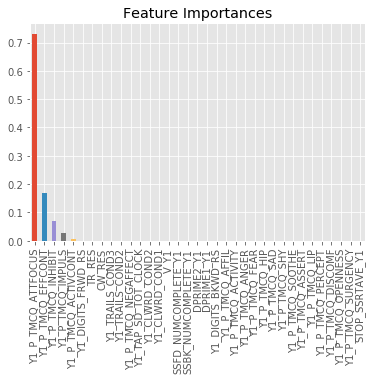

In [93]:
feat_imp = pd.Series(pipeline.steps[1][1].feature_importances_,index=X.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')